In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns


from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

## 1. IMPORTATION DES DONNEES

In [4]:
fichier_excel = r"F:\Mes_Documents_de_these\DOCUMENTS_RECHERCHE\DOCUMENTS_DE_REPPORTS\Datasets_theses\Rapports2019\01janvier2019\01012019Ma.xlsx" # le chemain du fichier  

donnees = pd.read_excel(fichier_excel,sheet_name=None) # lecture du fichier avec tous les feuilles selon (sheet_name= None)

In [5]:
donnees.keys() # L'ensemble des feuilles contenues dans le classeur du 01/01/2019

dict_keys(['Rapport', 'Centrales', 'Demande', 'Délestage', 'P Inst', 'Energie', 'Pdel', 'Pdispo', 'Clients HT', 'liens', 'Reseau', 'Feuil1'])

In [6]:
"""# selection de l'ensemble des lignes non definies 
df_cleaned = Centrale[~Centrale.apply(lambda x: x.astype(str).str.contains("Unnamed").all(), axis=1)]


df_cleaned = df_cleaned.reset_index(drop=True) # suppression des deux

df_cleaned.columns = df_cleaned.iloc[1]  # Définir la première ligne restante comme en-têtes 

df_cleaned = df_cleaned[1:].reset_index(drop=True)[1:]  # Supprimer cette première ligne après en-tête

df_cleaned"""

'# selection de l\'ensemble des lignes non definies \ndf_cleaned = Centrale[~Centrale.apply(lambda x: x.astype(str).str.contains("Unnamed").all(), axis=1)]\n\n\ndf_cleaned = df_cleaned.reset_index(drop=True) # suppression des deux\n\ndf_cleaned.columns = df_cleaned.iloc[1]  # Définir la première ligne restante comme en-têtes \n\ndf_cleaned = df_cleaned[1:].reset_index(drop=True)[1:]  # Supprimer cette première ligne après en-tête\n\ndf_cleaned'

## 2. Conformite des donnees

In [7]:
""" 
Cette section serve a identifier pour le mois de janvier l'ensemble de classeurs qui ont les memes feuilles
afin de faire un traitement specifique pour chaque groupe  
"""

# Le chemin a suivre pour itterer tout le mois de janvier jour par jour
dossier = r"F:\Mes_Documents_de_these\DOCUMENTS_RECHERCHE\DOCUMENTS_DE_REPPORTS\Datasets_theses\Rapports2019\01janvier2019"  


# liste des fichiers contenus dans le dossier du mois de janvier avec elimination des extentions non conformes
fichiers_excel1 = [f for f in os.listdir(dossier) if f.endswith(".xlsx") and not f.startswith("~$")]

 
# innitialisation pour conpter le nombres de fichiers qui ont les meme feuilles et ceux qui sont differents
vraie, faux = 0, 0

# inintiasation de listes qui contiennent les chemins des differents fichiers
listvraie,lisfaux = [],[] 


for classeur in fichiers_excel1:
    
    
    chemin_complet = os.path.join(dossier, classeur) # pour avoir le chemin complet
    
    
    if pd.read_excel(chemin_complet,sheet_name=None).keys() == donnees.keys(): # comparaison des cles
        
       print(f"Ok pour ce classeur {classeur}") # affichage du dossier
       
       vraie +=1 # iteration
       
       listvraie.append(classeur) # ajouter dans la liste
    else:
        print(f'Ce classseur {classeur} a des feuilles differentes ') # affichages du dossier
        
        lisfaux.append(classeur) # ajout dans le liste
        
        faux +=1 #itteration

print(f'le nombres de fichiers ok {vraie}')

print(f'le nombres de fichiers defecteux {faux}')

Ok pour ce classeur 01012019Ma.xlsx
Ok pour ce classeur 02012019Me.xlsx
Ok pour ce classeur 03012019J.xlsx
Ce classseur 04012019V.xlsx a des feuilles differentes 
Ce classseur 05012019S.xlsx a des feuilles differentes 
Ce classseur 06012019D.xlsx a des feuilles differentes 
Ce classseur 07012019L.xlsx a des feuilles differentes 
Ce classseur 08012019Ma.xlsx a des feuilles differentes 
Ce classseur 09012019Me.xlsx a des feuilles differentes 
Ce classseur 10012019J.xlsx a des feuilles differentes 
Ce classseur 11012019V.xlsx a des feuilles differentes 
Ce classseur 12012019S.xlsx a des feuilles differentes 
Ce classseur 13012019D.xlsx a des feuilles differentes 
Ce classseur 14012019L.xlsx a des feuilles differentes 
Ce classseur 15012019Ma.xlsx a des feuilles differentes 
Ce classseur 16012019Me.xlsx a des feuilles differentes 
Ce classseur 17012019J.xlsx a des feuilles differentes 
Ce classseur 18012019V.xlsx a des feuilles differentes 
Ce classseur 19012019S.xlsx a des feuilles differ

**Dans cette section** 

Nous allons creer deux groupe selon le contenu des classeuers et chaque groupe sera une liste qui contient l'ensemble des classeurs qui ont les meme feuilles

In [8]:

fichiers_excel1 = [f for f in os.listdir(dossier) if f.endswith(".xlsx") and not f.startswith("~$")]


classeur_NO1,classeur_N02 =[],[] # initiasation de liste


for classeur in fichiers_excel1:
    
    if classeur in listvraie:
        
        chemin_complet = os.path.join(dossier, classeur) # chemin compet
        
        
        # recuperation des classeurs de meme feuilles
        classeur_NO1.append(pd.read_excel(chemin_complet,sheet_name=None)) 
        
    else:
        chemin_complet = os.path.join(dossier, classeur) # chemin complet
        
        
        # recuperation des classeurs de meme feuilles
        classeur_N02.append(pd.read_excel(chemin_complet,sheet_name=None))

In [9]:
print(f'Nombre de classeurs avec meme feuille : NO1 =  {len(classeur_NO1)}')

print(f'Nombre de classeurs avec meme feuille : N02 = {len(classeur_N02)}')

Nombre de classeurs avec meme feuille : NO1 =  11
Nombre de classeurs avec meme feuille : N02 = 20


In [10]:
# IL faux verifier si les classeurs different du classeur de teste sont identique entre eux selon les 
# feuille qu'ils contiennent

for i in range(len(classeur_N02[0].keys())):
    
    if classeur_N02[i].keys() == classeur_N02[0].keys(): # comparaison des feuilles 
        
        print("ok")
        
    else:
        
        print("differente")

ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok


### Verification de la conformite du contenue des feuilles pour chaque classeur

In [11]:
print(classeur_NO1[0].keys()) # Affichage des noms des feuilles dans ce claasseur d'indice 0 groupe 1

dict_keys(['Rapport', 'Centrales', 'Demande', 'Délestage', 'P Inst', 'Energie', 'Pdel', 'Pdispo', 'Clients HT', 'liens', 'Reseau', 'Feuil1'])


In [12]:
print(classeur_N02[0].keys()) # Affichage des noms des feuilles de ce classeur d'indece 0 groupee2

dict_keys(['Rapport', 'Centrales', 'Demande', 'Délestage', 'P Inst', 'Energie', 'Pdel', 'Pdispo', 'Clients HT', 'liens', 'Feuil2', 'Reseau', 'Feuil1'])


## 3. Chargement des donnees pour chaque classeur pour l'annee 2019

### 3.1. Donnees mensuelles pour les centrales

In [13]:
liste_centrales = []
for fichier in fichiers_excel1:
    
    chemin_complet = os.path.join(dossier, fichier) # pour avoir le chemin complet
    
    classeur = pd.read_excel(chemin_complet,sheet_name=None) # Importation du classeur avec toutes les feuilles
    
    for feuilles in classeur.keys(): # iteration sur les feuilles du classeur
        
        if feuilles == 'Centrales': # comparaison avec la feuille du nom Centrale
    
            Centrale = classeur['Centrales'] # recuperation du dataframe Centrale

            Centrale.columns = Centrale.iloc[1] # Définir la première ligne restante comme en-têtes 

            Centrale = Centrale[2:].reset_index(drop=True)[:27] # Supprimer les deux premieres ligne apres l'en tetes
            
            liste_centrales.append(Centrale)
            
    Centrales_2019 = pd.concat(liste_centrales,axis=0) # concatenation de l'ensemble des dataframe pour l'année 2024

In [14]:
Centrales_2019.shape

(837, 28)

In [15]:
Centrales_2019.head()

1,Heure,C6,C7,kah 1,Manantali,GTI,Somelec,Kounoune,Agg edm,APR,...,PV Bokhol,PV Sakal,PV Mbour,PV Merina Mekhé,PV Santhiou Mekhé,PV Kahone,Total PV,PV DIASS,NaN,NaN
0,1 h,82.3,78.2,0,9.365707,0,0,29.8,0,106.9,...,0,0,0,0,0,0,0,0,NaN,12.7
1,2 h,83.2,78.2,0,19.677563,0,0,29.8,0,75.2,...,0,0,0,0,0,0,0,0,NaN,NaN
2,3 h,82.2,77.8,0,17.521857,0,0,29.8,0,73.9,...,0,0,0,0,0,0,0,0,NaN,NaN
3,4 h,68.4,62.3,0,0,0,0,29.8,0,77.2,...,0,0,0,0,0,0,0,0,NaN,NaN
4,5 h,68.3,52.2,0,24.902888,0,0,29.8,0,75.1,...,0,0,0,0,0,0,0,0,NaN,NaN


In [16]:
Centrales_2019.describe()

1,NaN,NaN
count,0.0,3.100000e+01
mean,NaN,1.270000e+01
std,NaN,5.417160e-15
min,NaN,1.270000e+01
25%,NaN,1.270000e+01
50%,NaN,1.270000e+01
75%,NaN,1.270000e+01
max,NaN,1.270000e+01


<Axes: >

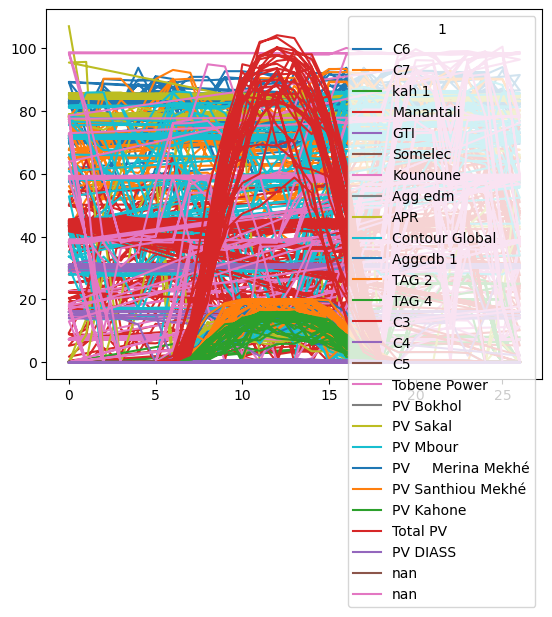

In [17]:
Centrales_2019.plot()

In [18]:
liste_pv = list(Centrales_2019.columns[19:26])
liste_pv
Total_PV = Centrales_2019[liste_pv[5]]

### 3.2. Donnees mensuelles pour les Demandes en 2019

In [19]:
liste_demande = []
for fichier in fichiers_excel1:
    
    chemin_complet = os.path.join(dossier, fichier) # pour avoir le chemin complet
    
    classeur = pd.read_excel(chemin_complet,sheet_name=None)
    
    for feuilles in classeur.keys():
        
        if feuilles == 'Demande':
    
            Demande = classeur['Demande']

            Demande.columns  = classeur['Demande'].iloc[1]

            Demande = Demande[2:].reset_index(drop=True)[:27]

            Demande = Demande.loc[:,list(Demande.columns[:5])]
            liste_demande.append(Demande)
    Demande_2019 = pd.concat(liste_demande,axis=0) 

In [20]:
Demande_2019.head(100)

1,Heure,Puis. Dispo,Puis TAG couplée,Demande,Fréq
0,1 h,636.930263,0,430.407707,50.109
1,2 h,636.930263,0,406.129563,49.939
2,3 h,636.930263,0,372.603857,50.281
3,4 h,636.930263,0,356.614,50.365
4,5 h,636.930263,0,352.424888,50.199
...,...,...,...,...,...
14,15 h,555.25612,0,419.2842,NaN
15,16 h,552.90656,0,428.812797,NaN
16,17 h,547.311269,0,430.040519,NaN
17,18 h,537.182,0,447.321663,NaN


<Axes: >

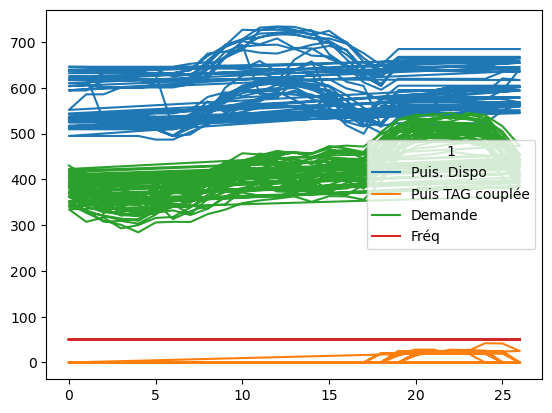

In [21]:
Demande_2019.drop("Heure",axis=1).plot()

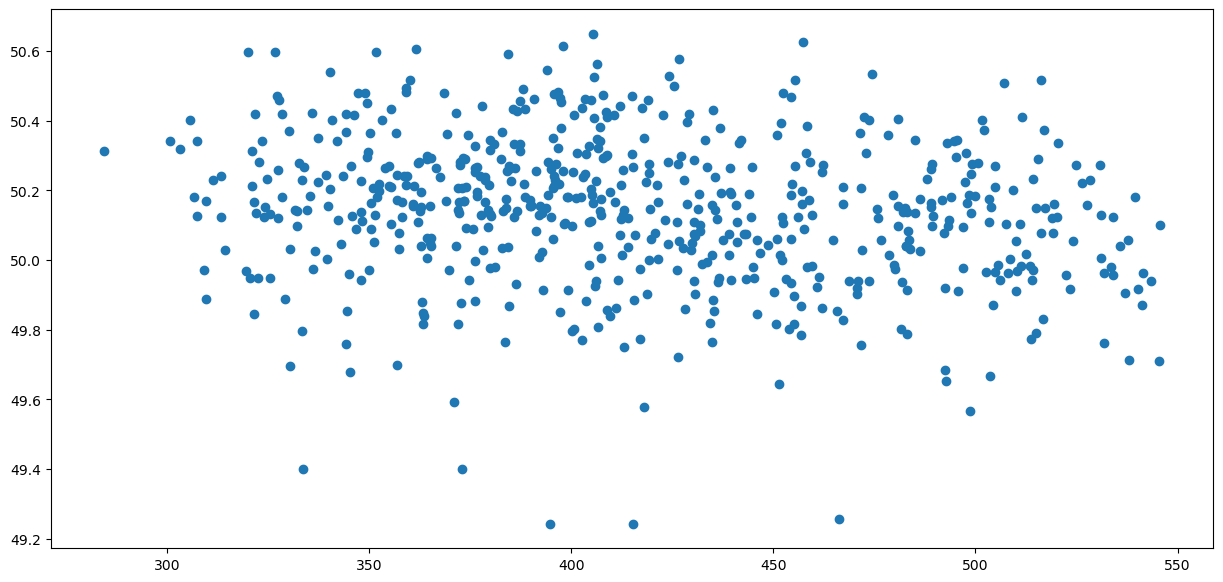

In [22]:
fig = plt.figure(figsize=(15,7))
plt.scatter(Demande_2019.Demande,Demande_2019.Fréq)

<Axes: >

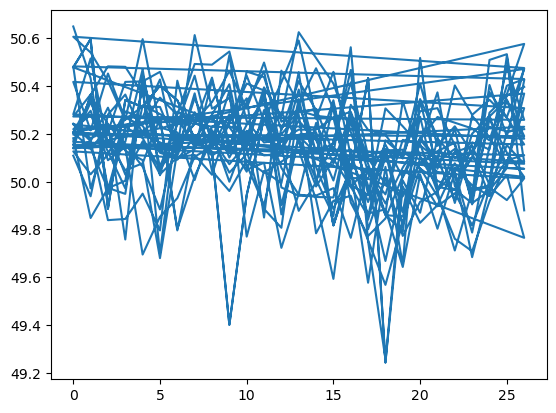

In [23]:
Demande_2019.Fréq.plot()

### 3.2. Donnees mensuelles pour les Delestage en 2019

In [24]:
liste_Délestage = []
for fichier in fichiers_excel1:
    
    chemin_complet = os.path.join(dossier, fichier) # pour avoir le chemin complet
    
    classeur = pd.read_excel(chemin_complet,sheet_name=None)
    
    for feuilles in classeur.keys():
        
        if feuilles == 'Délestage':
    
           Délestage = classeur['Délestage']

           Délestage.columns  = classeur['Délestage'].iloc[1]
           
           Délestage =  Délestage[2:].reset_index(drop=True)[:27]
           
           Délestage = Délestage[Délestage.columns[:7]]
           
           liste_Délestage.append( Délestage) 
            
    Délestage_2019 = pd.concat(liste_Délestage,axis=0) 

In [25]:
Délestage_2019.head()

1,Heure,P.dispo (MW),Demande (MW),Délest par Manque Product,P. Effacée (MW),Autres P. coupée (MW),Déficit total (MW)
0,1 h,636.930263,430.407707,0,0,0,0
1,2 h,636.930263,406.129563,0,0,0,0
2,3 h,636.930263,372.603857,0,0,0,0
3,4 h,636.930263,356.614,0,0,3.3,3.3
4,5 h,636.930263,352.424888,0,0,0,0


In [26]:
Délestage_2019

1,Heure,P.dispo (MW),Demande (MW),Délest par Manque Product,P. Effacée (MW),Autres P. coupée (MW),Déficit total (MW)
0,1 h,636.930263,430.407707,0,0,0,0
1,2 h,636.930263,406.129563,0,0,0,0
2,3 h,636.930263,372.603857,0,0,0,0
3,4 h,636.930263,356.614,0,0,3.3,3.3
4,5 h,636.930263,352.424888,0,0,0,0
...,...,...,...,...,...,...,...
22,21 h,684.65,502.607241,0,0,8.9,8.9
23,21 h 30,684.65,509.316538,0,0,0.05,0.05
24,22 h,684.65,499.258087,0,0,0.1,0.1
25,23 h,684.65,454.315878,0,0,0.05,0.05


#### Analyse graphique sur le delestage en 2019

<Axes: >

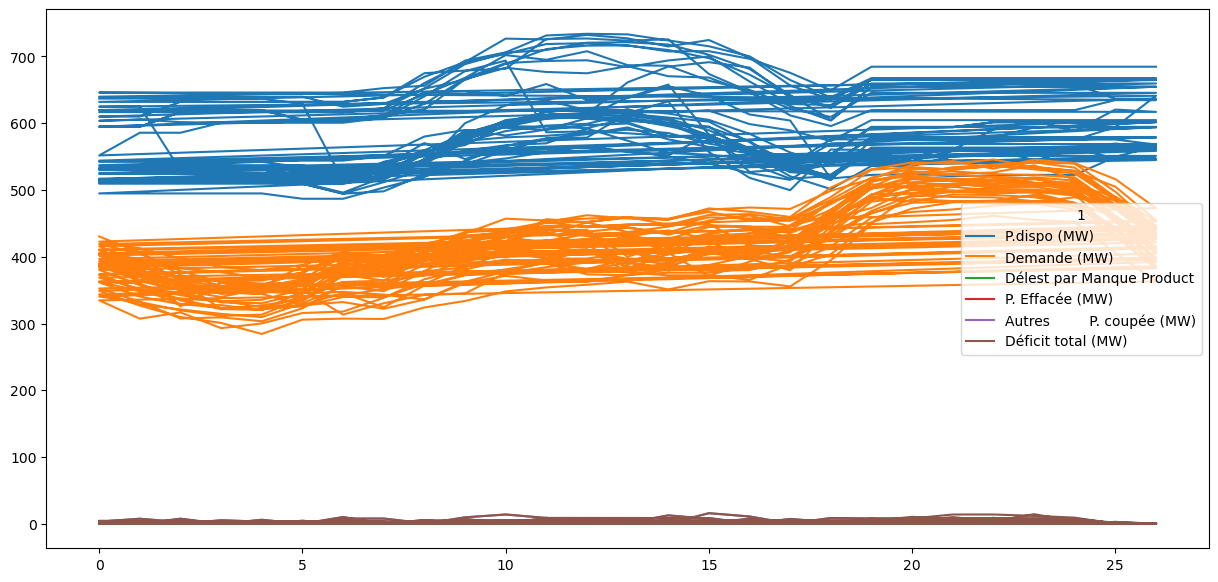

In [27]:
Délestage_2019.plot(figsize=(15,7))

In [28]:
P_Inst = donnees['P Inst']

### 3.3. Donnees mensuelles pour les energie en 2019

In [29]:
donnees['Energie'].head()

,Heures,106,301,303,TAG2,TAG4,401,402,403,404,...,Unnamed: 28,PV Sakal,RI,Manantali+Felou+Somelec,RGI,RGI.1,RGI.2,RGI.3,RGI.4,Export Senelec
0,1,NaN,21,22.0,0.0,0.0,NaN,15.1,NaN,0.0,...,NaN,0.0,421.754,9.365707,431.119707,108.607944,NaN,NaN,NaN,0.0
1,2,NaN,21.1,23.0,0.0,0.0,NaN,15.0,NaN,0.0,...,NaN,0.0,403.672,19.677563,423.349563,106.650484,NaN,NaN,NaN,0.0
2,3,NaN,21,23.0,0.0,0.0,NaN,15.0,NaN,0.0,...,NaN,0.0,382.912,17.521857,400.433857,100.877545,NaN,NaN,NaN,0.0
3,4,NaN,21,22.0,0.0,0.0,NaN,15.1,NaN,0.0,...,NaN,0.0,333.992,0.000000,333.992000,84.139472,9.365707,NaN,NaN,0.0
4,5,NaN,20.7,22.0,0.0,0.0,NaN,15.1,NaN,0.0,...,NaN,0.0,328.956,24.902888,353.858888,89.144350,19.677563,NaN,NaN,0.0


### 3.4. Donnees mensuelles pour les Pdel en 2019

In [30]:
donnees['Pdel'].head()

,T,Départ,Heuredébut,Heurefin,Puissance (kW),00:00:00,1:00:00,2:00:00,3:00:00,4:00:00,...,20:30:00,21:00:00,21:30:00,22:00:00,23:00:00,"1 day, 0:00:00",DUREE,END,Unnamed: 35,Unnamed: 36
0,NaN,NaN,NaN,NaN,NaN,0.0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.00,0.00,0.0,NaN,13793.5,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,0.0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.00,0.00,0.0,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,0.0,0,0.0,0.0,3.3,...,0.0,0.0,0.0,0.02,0.02,0.0,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,0.0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.00,0.00,0.0,NaN,NaN,NaN,NaN
4,Manq Prod,NaN,NaN,NaN,NaN,0.0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.00,0.00,0.0,00:00:00,0.0,NaN,NaN


### 3.5. Donnees mensuelles pour les Pdispo en 2019

In [31]:
liste_Pdispo = []
for fichier in fichiers_excel1:
    
    chemin_complet = os.path.join(dossier, fichier) # pour avoir le chemin complet
    
    classeur = pd.read_excel(chemin_complet,sheet_name=None)
    
    for feuilles in classeur.keys():
        
        if feuilles == 'Pdispo':
    
           Pdispo = donnees['Pdispo']
           
           Pdispo.columns = Pdispo.iloc[1]
           
           Pdispo  = Pdispo[2:].reset_index(drop=True)[:27]
           
           liste_Pdispo.append( Pdispo) 
            
    Pdispo_2019 = pd.concat(liste_Pdispo,axis=0) 

In [32]:
Pdispo_2019.shape

(837, 47)

In [33]:
Pdispo_2019.head()

1,NaN,106.0,301,302.0,303.0,TG2,TG3,TG4,105,106.0,...,PV mekhé,PV Bokhol,PV Mbour,PV Kahone,PV Sakal,NaN,NaN,quota,NaN,NaN
0,01H00,0.0,22,0.0,22.0,18,NaN,25,NaN,NaN,...,0,0,0,0,0,0.0,4.75,22.280263,636.930263,0.0
1,02H00,0.0,22,0.0,22.0,18,NaN,25,NaN,NaN,...,0,0,0,0,0,0.0,4.75,22.280263,636.930263,0.0
2,03H00,0.0,22,0.0,22.0,18,NaN,25,NaN,NaN,...,0,0,0,0,0,0.0,4.75,22.280263,636.930263,0.0
3,04H00,0.0,22,0.0,22.0,18,NaN,25,NaN,NaN,...,0,0,0,0,0,0.0,4.75,22.280263,636.930263,0.0
4,05H00,0.0,22,0.0,22.0,18,NaN,25,NaN,NaN,...,0,0,0,0,0,0.0,4.75,22.280263,636.930263,0.0


# Autres techniques

In [34]:
import os
import pandas as pd

liste_demande = []

for fichier in fichiers_excel1:
    chemin_complet = os.path.join(dossier, fichier)

    try:
        classeur = pd.read_excel(chemin_complet, sheet_name=None)
    except Exception as e:
        print(f"Erreur lors de l'ouverture de {chemin_complet} : {e}")
        continue

    if "Demande" in classeur:
        Demande = classeur["Demande"]

        try:
            Demande.columns = Demande.iloc[1]  # Redéfinir les colonnes
            Demande = Demande[2:].reset_index(drop=True)  # Commencer à la 3e ligne

            # Nettoyage et gestion de la colonne Heure
            if 'Heure' in Demande.columns:
                print(f"Valeurs brutes dans 'Heure' pour {fichier}:")
                print(Demande['Heure'].unique())  # Afficher les valeurs uniques pour inspection

                # Extraire les chiffres uniquement
                Demande['Heure'] = Demande['Heure'].str.extract(r'(\d+)')  # Extraire les nombres

                # Vérification des valeurs problématiques
                if Demande['Heure'].isnull().any():
                    print(f"Valeurs non valides détectées dans {fichier}. Lignes problématiques :")
                    print(Demande[Demande['Heure'].isnull()])  # Afficher les lignes problématiques
                    Demande = Demande.dropna(subset=['Heure'])  # Supprimer les lignes invalides

                # Convertir en numérique
                Demande['Heure'] = Demande['Heure'].astype(float)

                # Convertir les heures en datetime (par exemple, à partir de "2025-01-01")
                base_date = pd.Timestamp("2019-01-01")
                heures_repetées = Demande['Heure'].astype(int).tolist()

                # Création d'une liste incrémentée d'heures
                heures_incrementées = [
                    base_date + pd.Timedelta(hours=h-1 + i*24)
                    for i in range(len(heures_repetées) // 24 + 1)
                    for h in range(1, 25)
                ][:len(heures_repetées)]  # Limiter à la taille originale

                Demande['DateHeure'] = heures_incrementées

            # Mettre la colonne 'DateHeure' en index
            Demande.set_index('DateHeure', inplace=True)

            # Garder uniquement les 27 premières lignes et 5 colonnes
            Demande = Demande.iloc[:27, :5]
            liste_demande.append(Demande)
        except Exception as e:
            print(f"Erreur lors du traitement de la feuille 'Demande' dans {fichier} : {e}")

if liste_demande:
    Demande_2019 = pd.concat(liste_demande, axis=0)

    # Sauvegarder avec l'index
    Demande_2019.to_excel("Demande_2019.xlsx", index=True)
    print("Fichier 'Demande_2019.xlsx' généré avec succès.")
else:
    print("Aucune donnée extraite.")

Valeurs brutes dans 'Heure' pour 01012019Ma.xlsx:
['1 h' '2 h' '3 h' '4 h' '5 h' '6 h' '7 h' '8 h' '9 h' '10 h' '11 h'
 '12 h' '13 h' '14 h' '15 h' '16 h' '17 h' '18 h' '19 h' '19 h 30' '20 h'
 '20 h 30' '21 h' '21 h 30' '22 h' '23 h' '24 h' 'Max' 'Moy.' 'Min' nan]
Valeurs non valides détectées dans 01012019Ma.xlsx. Lignes problématiques :
1  Heure Puis. Dispo Puis TAG couplée     Demande       Fréq  NaN  NaN  NaN  \
27   NaN  657.903903                0  507.194066     50.534  NaN  NaN  NaN   
28   NaN  585.515072                0   410.56439  50.127481  NaN  NaN  NaN   
29   NaN  513.940263                0  313.325259     49.593  NaN  NaN  NaN   
30   NaN         NaN              NaN         NaN        NaN  NaN  NaN  NaN   
31   NaN         NaN              NaN         NaN        NaN  NaN  NaN        
32   NaN         NaN              NaN         NaN        NaN       NaN  NaN   
33   NaN         NaN              NaN         NaN        NaN       NaN  NaN   
34   NaN         NaN      

In [35]:
Demande_autr_forme = pd.read_excel("Demande_2019.xlsx")
Demande_autr_forme.head()

,DateHeure,Heure,Puis. Dispo,Puis TAG couplée,Demande,Fréq
0,2019-01-01 00:00:00,1,636.930263,0.0,430.407707,50.109
1,2019-01-01 01:00:00,2,636.930263,0.0,406.129563,49.939
2,2019-01-01 02:00:00,3,636.930263,0.0,372.603857,50.281
3,2019-01-01 03:00:00,4,636.930263,0.0,356.614000,50.365
4,2019-01-01 04:00:00,5,636.930263,0.0,352.424888,50.199


In [36]:
Demande_autr_forme.isna().sum()

DateHeure             0
Heure                 0
Puis. Dispo           0
Puis TAG couplée      0
Demande               0
Fréq                224
dtype: int64

In [37]:
Demande_autr_forme.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 837 entries, 0 to 836
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   DateHeure         837 non-null    datetime64[ns]
 1   Heure             837 non-null    int64         
 2   Puis. Dispo       837 non-null    float64       
 3   Puis TAG couplée  837 non-null    float64       
 4   Demande           837 non-null    float64       
 5   Fréq              613 non-null    float64       
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 39.4 KB


In [38]:
Demande_autr_forme.describe()

,DateHeure,Heure,Puis. Dispo,Puis TAG couplée,Demande,Fréq
count,837,837.000000,837.000000,837.000000,837.000000,613.000000
mean,2019-01-01 12:59:59.999999744,13.333333,591.595115,2.226404,420.599160,50.142515
min,2019-01-01 00:00:00,1.000000,486.850000,0.000000,284.344743,49.243000
25%,2019-01-01 06:00:00,7.000000,544.850000,0.000000,375.751790,50.015000
50%,2019-01-01 13:00:00,14.000000,585.750000,0.000000,412.925887,50.154000
75%,2019-01-01 20:00:00,20.000000,631.950000,0.000000,467.139058,50.276000
max,2019-01-02 02:00:00,24.000000,733.988833,42.000000,545.752726,50.650000
std,NaN,6.948374,56.563381,6.887106,59.904779,0.210841


In [39]:
frequence_couple = Demande_autr_forme['Fréq']
frequence_couple.isna().sum()

224

In [40]:
Demande_autr_forme = Demande_autr_forme.dropna()
Demande_autr_forme.isna().sum()

DateHeure           0
Heure               0
Puis. Dispo         0
Puis TAG couplée    0
Demande             0
Fréq                0
dtype: int64

In [41]:
Demande_autr_forme['ecare']=Demande_autr_forme['Puis. Dispo']-Demande_autr_forme['Demande']
Demande_autr_forme.head()

,DateHeure,Heure,Puis. Dispo,Puis TAG couplée,Demande,Fréq,ecare
0,2019-01-01 00:00:00,1,636.930263,0.0,430.407707,50.109,206.522556
1,2019-01-01 01:00:00,2,636.930263,0.0,406.129563,49.939,230.800700
2,2019-01-01 02:00:00,3,636.930263,0.0,372.603857,50.281,264.326406
3,2019-01-01 03:00:00,4,636.930263,0.0,356.614000,50.365,280.316263
4,2019-01-01 04:00:00,5,636.930263,0.0,352.424888,50.199,284.505375


In [42]:
Demande_autr_forme.ecare

0      206.522556
1      230.800700
2      264.326406
3      280.316263
4      284.505375
          ...    
832    182.042759
833    175.333462
834    185.391913
835    230.334122
836    276.006699
Name: ecare, Length: 613, dtype: float64

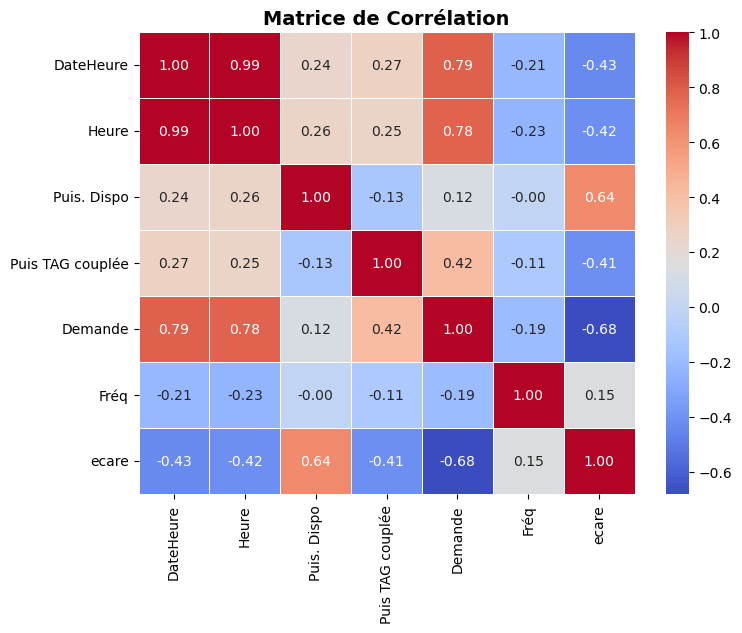

In [43]:
# Calcul de la matrice de corrélation
corr_matrix = Demande_autr_forme.corr()

# Création du heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

# Ajout d'un titre
plt.title("Matrice de Corrélation", fontsize=14, fontweight="bold")

# Affichage
plt.show()


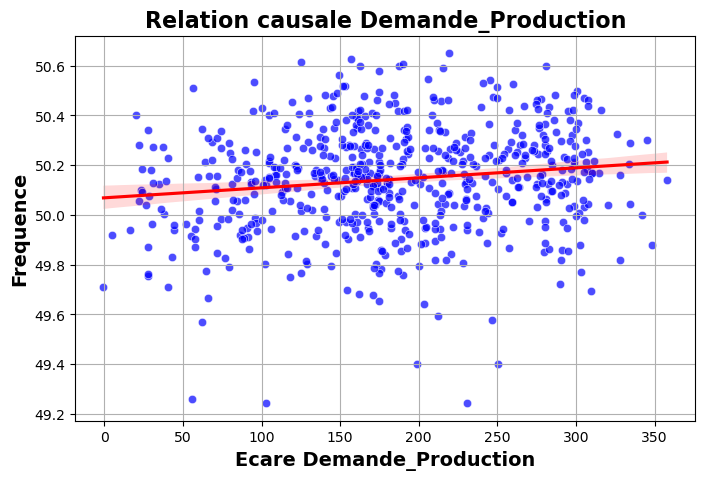

In [44]:
# Génération de données simulant une relation causale

X =Demande_autr_forme.ecare #loc['ecare']# Variable indépendante (cause)
Y = Demande_autr_forme.Fréq #loc['Fréq']  # Variable dépendante (effet)

# Création d'un DataFrame Pandas
data = pd.DataFrame({"Ecare Demande_Production": X, "Frequence": Y})

# Tracé du scatter plot
plt.figure(figsize=(8, 5))
sns.scatterplot(x="Ecare Demande_Production", y="Frequence", data=data, alpha=0.7, color="blue")

# Ajout d'une ligne de tendance
sns.regplot(x="Ecare Demande_Production", y="Frequence", data=data, scatter=False, color="red")

# Personnalisation
plt.xlabel("Ecare Demande_Production", fontsize=14, fontweight="bold")
plt.ylabel("Frequence", fontsize=14, fontweight="bold")
plt.title("Relation causale Demande_Production", fontsize=16, fontweight="bold")

plt.grid()
plt.show()


In [45]:
from scipy.stats import spearmanr

corr_spearman, _ = spearmanr(X, Y)
print(f"Corrélation de Spearman : {corr_spearman:.2f}")


Corrélation de Spearman : 0.14


In [46]:
from statsmodels.tsa.stattools import grangercausalitytests

# Création d'une DataFrame pour le test
df = pd.DataFrame({"Effet (Y)": Y, "Cause (X)": X})

# Test de causalité de Granger (lag=2)
grangercausalitytests(df, maxlag=4, verbose=True)



Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.7475  , p=0.3876  , df_denom=609, df_num=1
ssr based chi2 test:   chi2=0.7512  , p=0.3861  , df=1
likelihood ratio test: chi2=0.7507  , p=0.3863  , df=1
parameter F test:         F=0.7475  , p=0.3876  , df_denom=609, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=7.2799  , p=0.0008  , df_denom=606, df_num=2
ssr based chi2 test:   chi2=14.6799 , p=0.0006  , df=2
likelihood ratio test: chi2=14.5063 , p=0.0007  , df=2
parameter F test:         F=7.2799  , p=0.0008  , df_denom=606, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=5.4692  , p=0.0010  , df_denom=603, df_num=3
ssr based chi2 test:   chi2=16.5980 , p=0.0009  , df=3
likelihood ratio test: chi2=16.3762 , p=0.0009  , df=3
parameter F test:         F=5.4692  , p=0.0010  , df_denom=603, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=6.2535  , p=0.0001  

c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


{1: ({'ssr_ftest': (0.7474842714303724, 0.38761430662883056, 609.0, 1),
   'ssr_chi2test': (0.7511664599595861, 0.38610717376808923, 1),
   'lrtest': (0.7507058474034238, 0.38625284729199993, 1),
   'params_ftest': (0.7474842714231074, 0.3876143066311317, 609.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (7.279882989558341, 0.0007512247380427462, 606.0, 2),
   'ssr_chi2test': (14.679896061452627, 0.0006490842525047949, 2),
   'lrtest': (14.506321063495307, 0.000707933403358552, 2),
   'params_ftest': (7.279882989559631, 0.0007512247380418507, 606.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (5.4691664063388385, 0.0010309930920377607, 603.0, 3),
   'ssr_chi2test': (16.59796770082931, 0.0008548580178123574, 3),
   'lrtest': (16.376168561604118, 0.0009493761216517944, 3),
   'params_ftest': (5.4691664063384104, 0.0010309930920383505, 603.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],


C:\Users\Abdoulaye_Faye\AppData\Local\Temp\ipykernel_5944\3623442796.py:3: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(start="2019-01-01 00:00:00", periods=Demande_autr_forme.shape[0], freq="H")


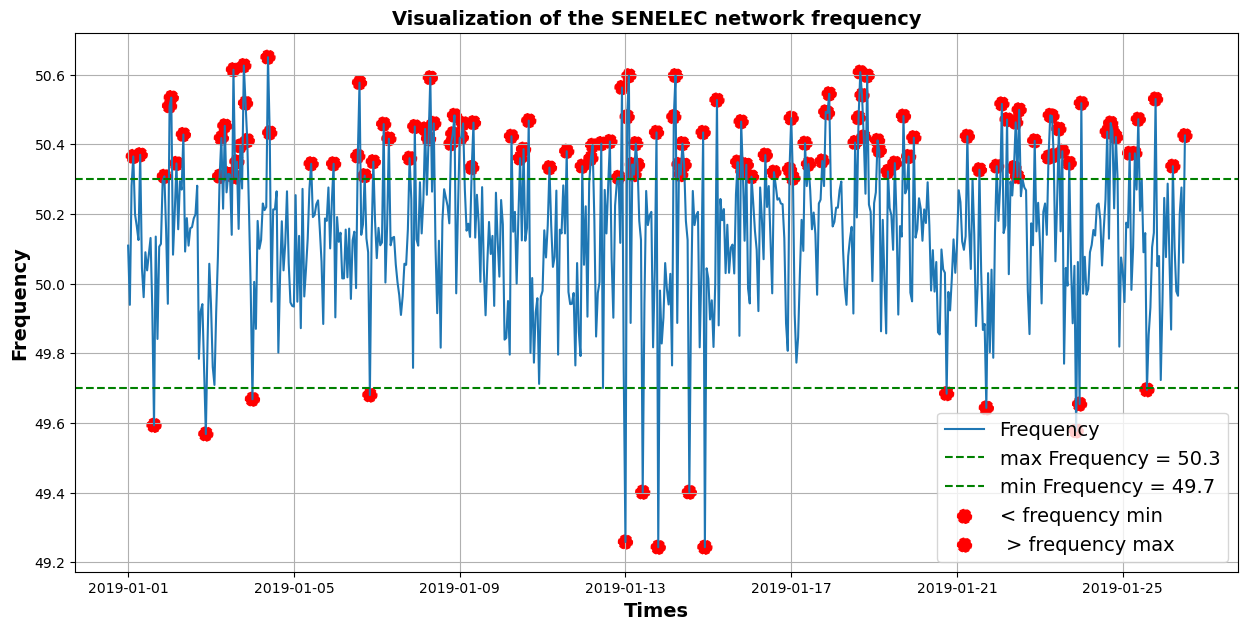

In [92]:
x = range(0,Demande_autr_forme.shape[0])

dates = pd.date_range(start="2019-01-01 00:00:00", periods=Demande_autr_forme.shape[0], freq="H")

y_max =50.3
y_min=49.7
len(x)
df = pd.DataFrame(
    {'frequence': Demande_autr_forme.Fréq ,
    'heurs':dates}
)
df_min = df.loc[df['frequence'] < y_min] 
df_max = df.loc[df['frequence'] > y_max] 

plt.figure(figsize=(15,7))
plt.plot(dates,Demande_autr_forme.Fréq,label= 'Frequency')
plt.axhline(y_max,color="green", linestyle="--", label=f"max Frequency = {y_max}")
plt.axhline(y_min,color="green", linestyle="--", label=f"min Frequency = {y_min}")

plt.scatter(df_min['heurs'], df_min['frequence'], color="red", label="< frequency min", s=100,linestyle="--")
plt.scatter(df_max['heurs'], df_max['frequence'], color="red", label=" > frequency max", s=100,linestyle="--")

plt.legend(fontsize=14)
plt.xlabel("Times",fontsize=14, fontweight="bold")
plt.ylabel("Frequency",fontsize=14, fontweight="bold")
plt.title("Visualization of the SENELEC network frequency",fontsize=14, fontweight="bold")
plt.grid()
plt.show()

In [48]:
frequence_min = Demande_autr_forme.loc[Demande_autr_forme.Fréq < y_min]
frequence_min.head()

,DateHeure,Heure,Puis. Dispo,Puis TAG couplée,Demande,Fréq,ecare
15,2019-01-01 15:00:00,16,582.863823,0.0,370.933560,49.593000,211.930263
45,2019-01-01 18:00:00,19,560.627440,0.0,498.741511,49.568000,61.885929
72,2019-01-01 18:00:00,19,569.733200,0.0,503.725240,49.667999,66.007960
275,2019-01-01 05:00:00,6,516.550000,0.0,345.377115,49.680000,171.172885
477,2019-01-01 18:00:00,19,521.682308,0.0,466.182856,49.257999,55.499452


In [49]:
liste_colonnes = list(frequence_min.columns[2:])

In [50]:
frequence_min[liste_colonnes].describe()

,Puis. Dispo,Puis TAG couplée,Demande,Fréq,ecare
count,14.000000,14.0,14.000000,14.000000,14.000000
mean,595.159854,0.0,420.494801,49.522000,174.665053
std,55.642633,0.0,63.969581,0.175271,77.978364
min,516.550000,0.0,330.454022,49.243000,55.499452
25%,562.903880,0.0,371.454957,49.401001,117.564247
50%,583.567230,0.0,416.672109,49.585000,186.844601
75%,650.925000,0.0,485.927051,49.664499,225.888842
max,667.650000,0.0,503.725240,49.695000,309.295978


In [51]:
Délestage_2019['Frequence'] = frequence_couple
Délestage_2019['pv_total'] = Total_PV.values 
Délestage_2019['ecare'] = Demande_autr_forme.ecare
Délestage_2019.head()

1,Heure,P.dispo (MW),Demande (MW),Délest par Manque Product,P. Effacée (MW),Autres P. coupée (MW),Déficit total (MW),Frequence,pv_total,ecare
0,1 h,636.930263,430.407707,0,0,0,0,50.109,0,206.522556
1,2 h,636.930263,406.129563,0,0,0,0,49.939,0,230.800700
2,3 h,636.930263,372.603857,0,0,0,0,50.281,0,264.326406
3,4 h,636.930263,356.614,0,0,3.3,3.3,50.365,0,280.316263
4,5 h,636.930263,352.424888,0,0,0,0,50.199,0,284.505375


In [70]:
Délestage_2019.columns

Index(['Heure', 'P.dispo (MW)', 'Demande (MW)', 'Délest par Manque Product',
       'P. Effacée (MW)', 'Autres         P. coupée (MW)',
       'Déficit total (MW)', 'Frequence', 'pv_total', 'ecare'],
      dtype='object', name=1)

In [73]:
names = {'Heure':'Time','P.dispo (MW)': 'Available (MW)','Demande (MW)': 'Demand (MW)', 'Délest par Manque Product':'Load Shedding Due to Product Shortage',
'P. Effacée (MW)':'Deleted (MW)', 'Autres         P. coupée (MW)':'Other Cut (MW)',
 'Déficit total (MW)':'Total Shortfall (MW)', 'Frequence':'Frequency', 'pv_total':'pv_total','ecare':'ecare'}

In [77]:
Délestage_2019 =Délestage_2019.rename(columns = names)

In [78]:
Délestage_2019.head()

1,Time,Available (MW),Demand (MW),Load Shedding Due to Product Shortage,Deleted (MW),Other Cut (MW),Total Shortfall (MW),Frequency,pv_total,ecare
0,1 h,636.930263,430.407707,0,0,0,0,50.109,0,206.522556
1,2 h,636.930263,406.129563,0,0,0,0,49.939,0,230.800700
2,3 h,636.930263,372.603857,0,0,0,0,50.281,0,264.326406
3,4 h,636.930263,356.614,0,0,3.3,3.3,50.365,0,280.316263
4,5 h,636.930263,352.424888,0,0,0,0,50.199,0,284.505375


In [79]:
Délestage_2019.info()

<class 'pandas.core.frame.DataFrame'>
Index: 837 entries, 0 to 26
Data columns (total 10 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Time                                   837 non-null    object 
 1   Available (MW)                         837 non-null    object 
 2   Demand (MW)                            837 non-null    object 
 3   Load Shedding Due to Product Shortage  837 non-null    object 
 4   Deleted (MW)                           837 non-null    object 
 5   Other Cut (MW)                         837 non-null    object 
 6   Total Shortfall (MW)                   837 non-null    object 
 7   Frequency                              837 non-null    float64
 8   pv_total                               837 non-null    object 
 9   ecare                                  837 non-null    float64
dtypes: float64(2), object(8)
memory usage: 71.9+ KB


In [80]:
Délestage_2019.isna().sum()

1
Time                                     0
Available (MW)                           0
Demand (MW)                              0
Load Shedding Due to Product Shortage    0
Deleted (MW)                             0
Other Cut (MW)                           0
Total Shortfall (MW)                     0
Frequency                                0
pv_total                                 0
ecare                                    0
dtype: int64

In [82]:
fequence_delestage = Délestage_2019.drop("Time",axis=1)
fequence_delestage.head()#describe()

1,Available (MW),Demand (MW),Load Shedding Due to Product Shortage,Deleted (MW),Other Cut (MW),Total Shortfall (MW),Frequency,pv_total,ecare
0,636.930263,430.407707,0,0,0,0,50.109,0,206.522556
1,636.930263,406.129563,0,0,0,0,49.939,0,230.800700
2,636.930263,372.603857,0,0,0,0,50.281,0,264.326406
3,636.930263,356.614,0,0,3.3,3.3,50.365,0,280.316263
4,636.930263,352.424888,0,0,0,0,50.199,0,284.505375


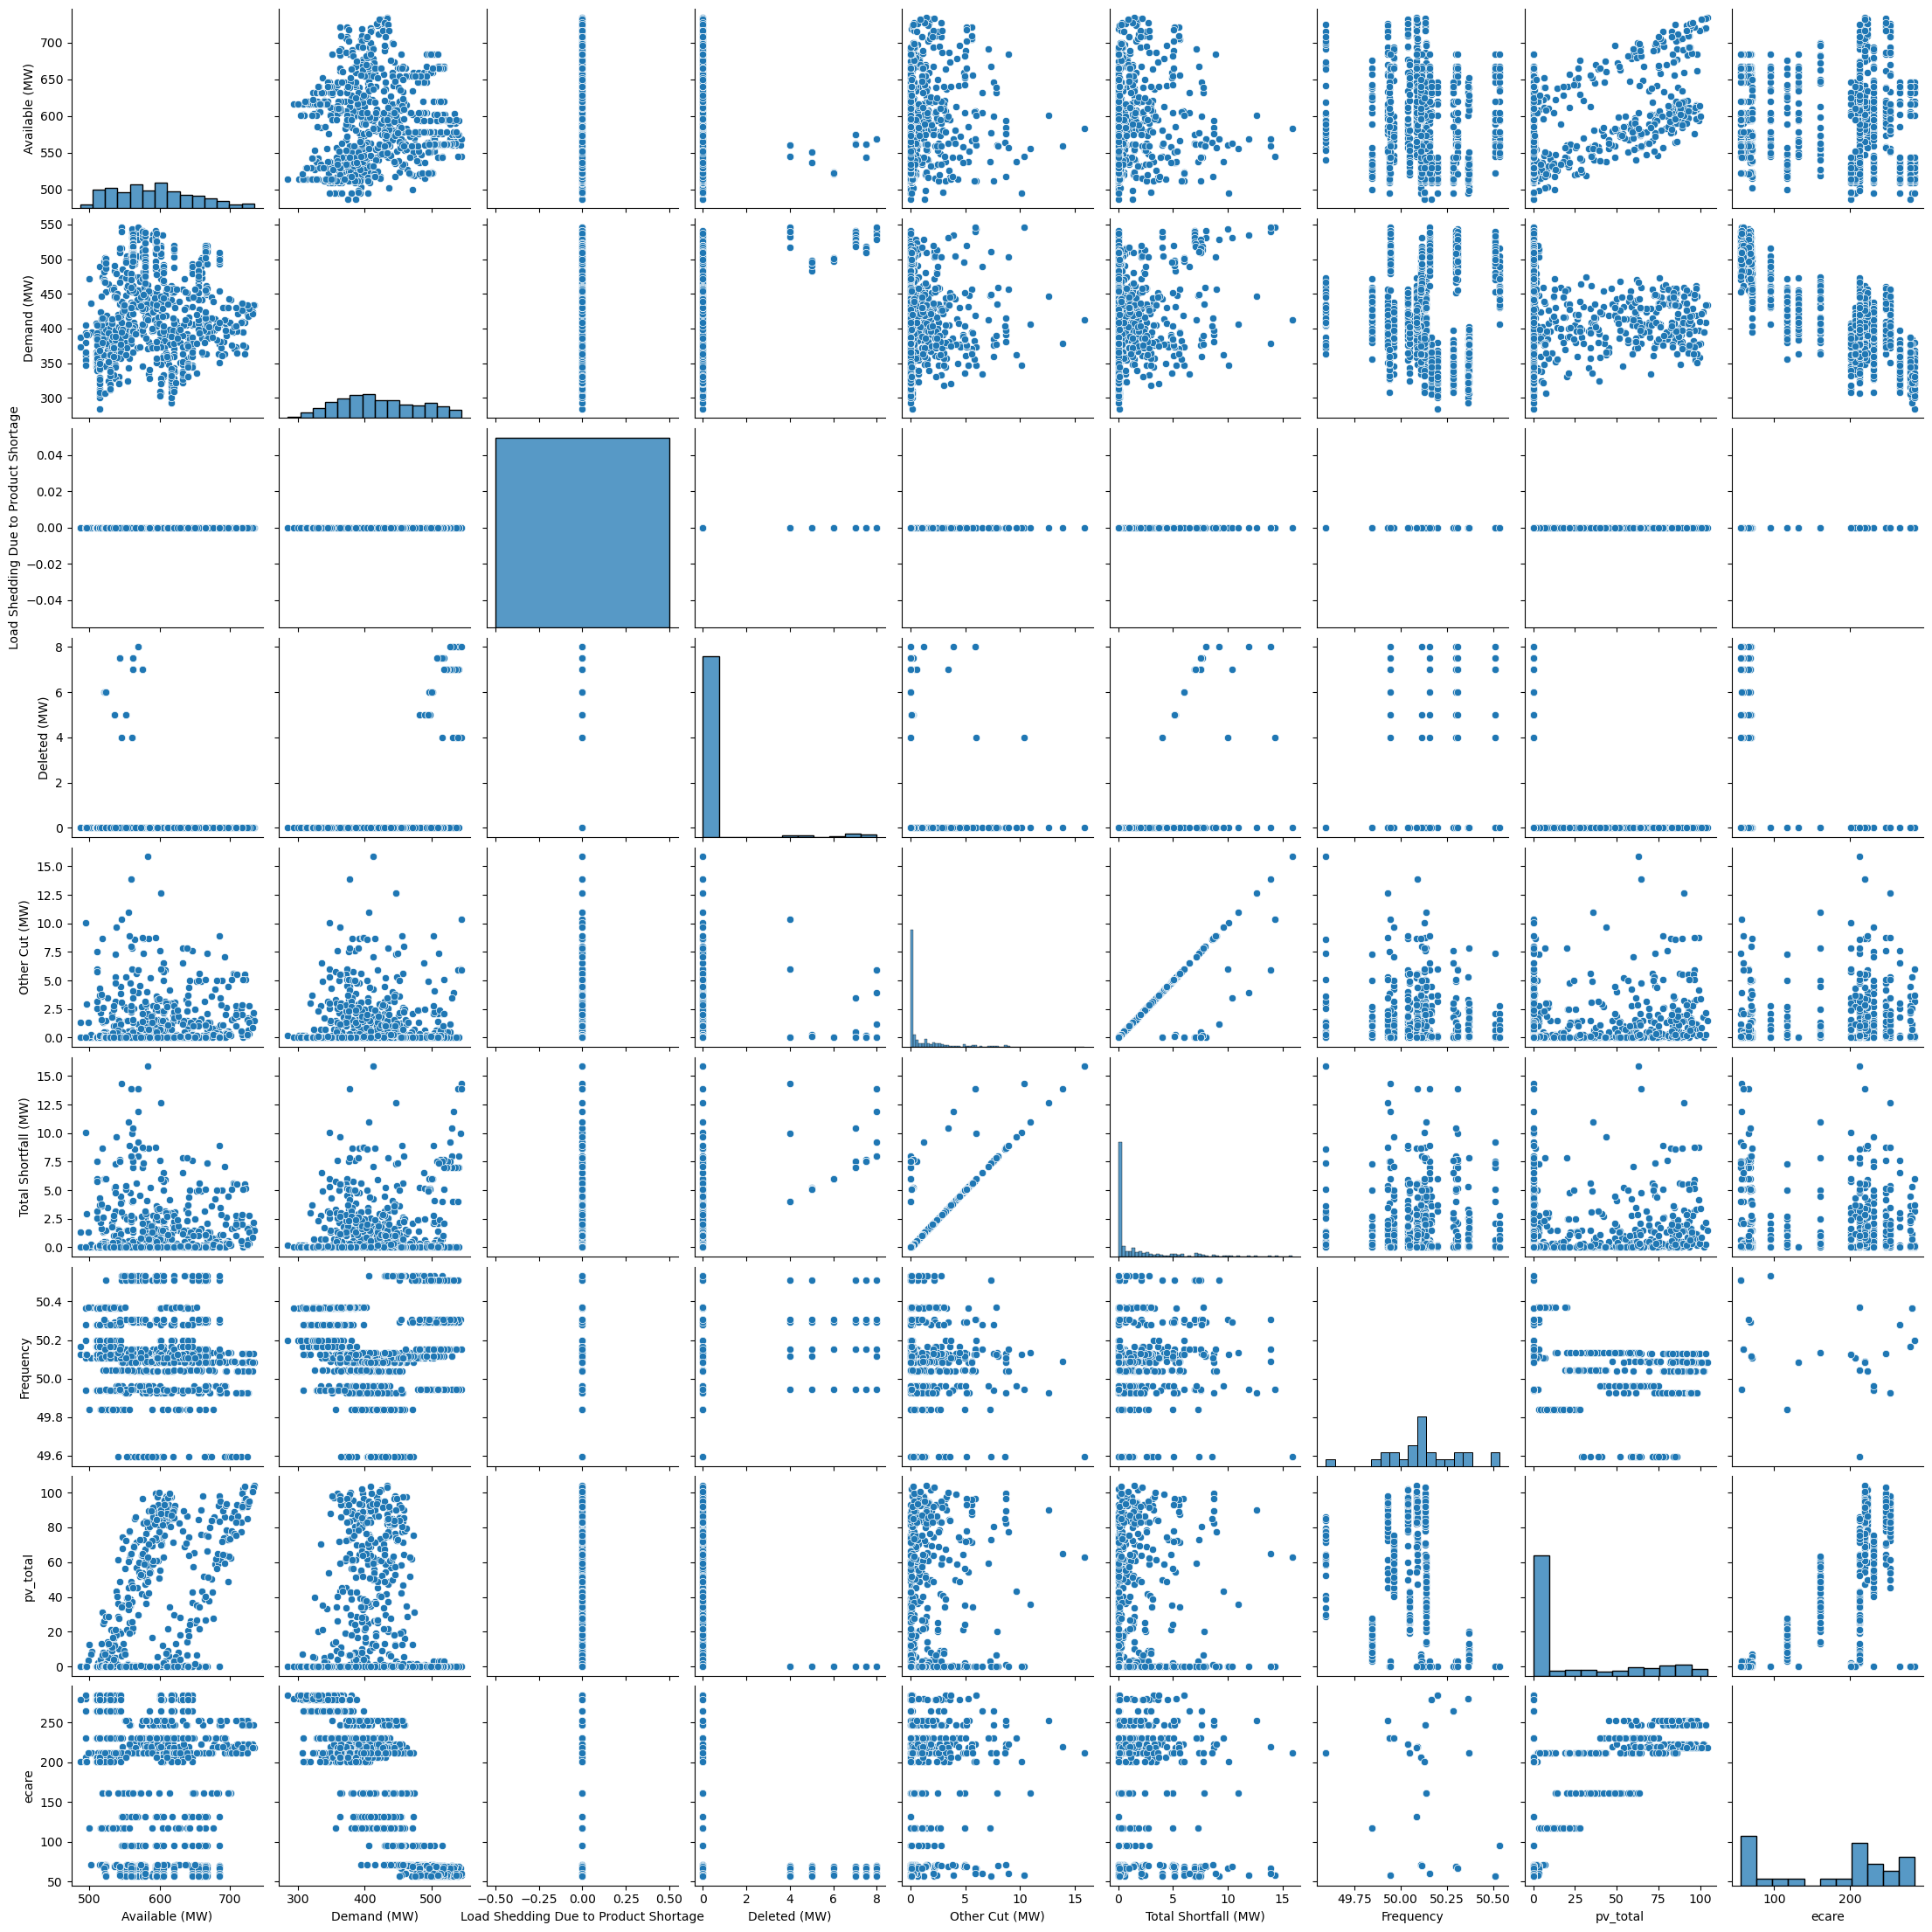

In [83]:
sns.pairplot(fequence_delestage, hue=None,kind='scatter',diag_kind='auto',markers=None)

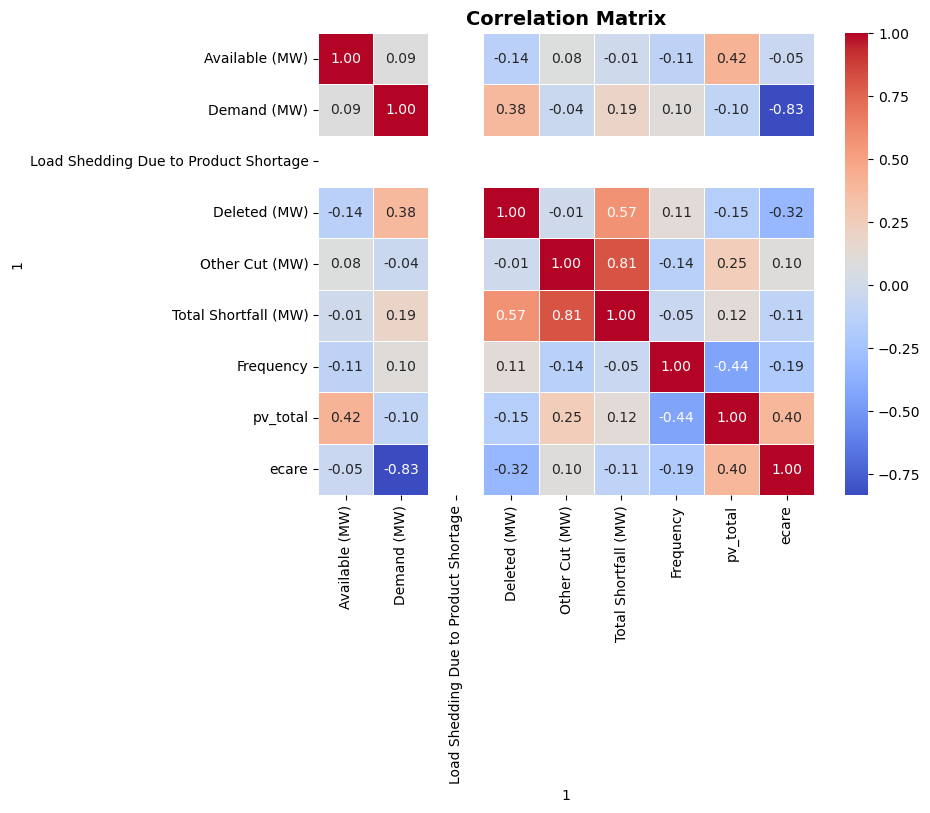

In [84]:
# Calcul de la matrice de corrélation
corr_Délestage_2019 = fequence_delestage .corr()

# Création du heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_Délestage_2019, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

# Ajout d'un titre
plt.title("Correlation Matrix", fontsize=14, fontweight="bold")

# Affichage
plt.show()

In [85]:
fequence_delestage.describe()

1,Frequency,ecare
count,837.000000,837.000000
mean,50.127481,174.950682
std,0.196881,79.192965
min,49.593000,56.330934
25%,50.038000,70.734883
50%,50.114000,211.888870
75%,50.281000,230.800700
max,50.534000,284.505375


In [86]:
fequence_delestage.columns

Index(['Available (MW)', 'Demand (MW)',
       'Load Shedding Due to Product Shortage', 'Deleted (MW)',
       'Other Cut (MW)', 'Total Shortfall (MW)', 'Frequency', 'pv_total',
       'ecare'],
      dtype='object', name=1)

In [87]:
dates = pd.date_range(start="2019-01-01 00:00:00", periods=fequence_delestage.shape[0], freq="H")

C:\Users\Abdoulaye_Faye\AppData\Local\Temp\ipykernel_5944\2380416194.py:1: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(start="2019-01-01 00:00:00", periods=fequence_delestage.shape[0], freq="H")


<Axes: xlabel='Total Shortfall (MW)', ylabel='Frequency'>

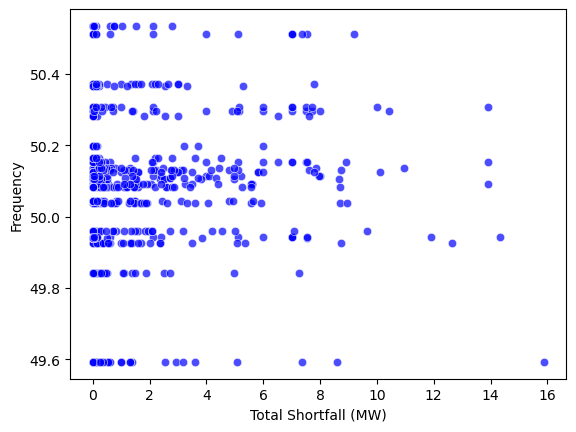

In [90]:
deffe = fequence_delestage[fequence_delestage.columns[2:]].drop('Frequency',axis=1)
plt.Figure(figsize=(15,7))
sns.scatterplot(x='Total Shortfall (MW)', y='Frequency', data=fequence_delestage, alpha=0.7, color="blue")

In [93]:
# Création d'une DataFrame pour le test
for i in fequence_delestage.drop(['Load Shedding Due to Product Shortage','Frequency'],axis=1).columns:
    cause = fequence_delestage[i]
    effet = fequence_delestage['Frequency']
    df = pd.DataFrame({"Effet (Y)": effet, "Cause (X)": cause})
    print(f"Relation causale entre {i} et la frequence")
    # Test de causalité de Granger (lag=2)
    grangercausalitytests(df, maxlag=4, verbose=True)

Relation causale entre Available (MW) et la frequence

Granger Causality
number of lags (no zero) 1


c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


ssr based F test:         F=13.7803 , p=0.0002  , df_denom=833, df_num=1
ssr based chi2 test:   chi2=13.8300 , p=0.0002  , df=1
likelihood ratio test: chi2=13.7168 , p=0.0002  , df=1
parameter F test:         F=13.7803 , p=0.0002  , df_denom=833, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=16.3101 , p=0.0000  , df_denom=830, df_num=2
ssr based chi2 test:   chi2=32.8168 , p=0.0000  , df=2
likelihood ratio test: chi2=32.1883 , p=0.0000  , df=2
parameter F test:         F=16.3101 , p=0.0000  , df_denom=830, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=12.2395 , p=0.0000  , df_denom=827, df_num=3
ssr based chi2 test:   chi2=37.0294 , p=0.0000  , df=3
likelihood ratio test: chi2=36.2309 , p=0.0000  , df=3
parameter F test:         F=12.2395 , p=0.0000  , df_denom=827, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=12.9023 , p=0.0000  , df_denom=824, df_num=4
ssr based chi2 test: 

# Analyse en composant principale

In [95]:
fequence_delestage.head()#describe()

1,Available (MW),Demand (MW),Load Shedding Due to Product Shortage,Deleted (MW),Other Cut (MW),Total Shortfall (MW),Frequency,pv_total,ecare
0,636.930263,430.407707,0,0,0,0,50.109,0,206.522556
1,636.930263,406.129563,0,0,0,0,49.939,0,230.800700
2,636.930263,372.603857,0,0,0,0,50.281,0,264.326406
3,636.930263,356.614,0,0,3.3,3.3,50.365,0,280.316263
4,636.930263,352.424888,0,0,0,0,50.199,0,284.505375


Variance expliquée par la première composante : 0.33
Variance expliquée par la deuxième composante : 0.28


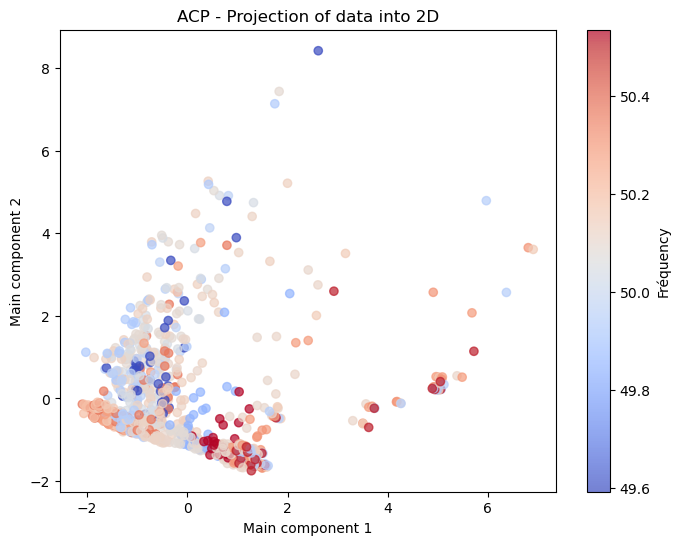

In [99]:
# Charger les données (remplacez "data.csv" par le nom réel de votre fichier)
df = fequence_delestage

# Vérifier les types et convertir si nécessaire
df = df.apply(pd.to_numeric, errors='coerce')

# Supprimer les lignes contenant des NaN (si des valeurs ont échoué à être converties)
df = df.dropna()

# Séparer les variables explicatives et la variable cible "Frequence"
X = df.drop(columns=["Frequency"])  # Variables indépendantes
y = df["Frequency"]  # Variable cible

# Normaliser les données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Appliquer l'ACP
pca = PCA(n_components=2)  # On réduit à 2 composantes pour la visualisation
X_pca = pca.fit_transform(X_scaled)

# Afficher la variance expliquée par chaque composante
explained_variance = pca.explained_variance_ratio_
print(f"Variance expliquée par la première composante : {explained_variance[0]:.2f}")
print(f"Variance expliquée par la deuxième composante : {explained_variance[1]:.2f}")

# Visualisation de l'ACP avec la couleur représentant la fréquence
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='coolwarm', alpha=0.7)
plt.colorbar(label="Fréquency")
plt.xlabel("Main component 1")
plt.ylabel("Main component 2")
plt.title("ACP - Projection of data into 2D")
plt.show()


### Interprétation de l'ACP - Projection des données en 2D
Cette figure représente la projection des données sur les deux premières composantes principales obtenues après l'Analyse en Composantes Principales (ACP). La couleur des points correspond à la fréquence, avec une échelle allant du bleu (fréquence basse) au rouge (fréquence élevée).

Distribution des points :

La majorité des points sont concentrés autour de la zone (0,0), ce qui suggère que les premières composantes principales expliquent bien la variance des données.

Il existe quelques points dispersés, notamment dans la partie droite et en hauteur, ce qui pourrait indiquer des observations atypiques ou une forte variabilité dans certaines dimensions des données.

Corrélation avec la Fréquence :

Les points bleus (fréquence plus basse) et rouges (fréquence plus élevée) sont répartis de manière hétérogène.

On observe une certaine variation de couleur en fonction des composantes principales, ce qui signifie que certaines variables explicatives influencent la fréquence.

La répartition montre que la fréquence pourrait être influencée par plusieurs facteurs, mais il n'y a pas de séparation nette indiquant une seule variable dominante.

Possibles interprétations :

Une région compacte en bas à gauche (autour de (-2,0)) regroupe beaucoup de points, ce qui indique que plusieurs observations partagent des caractéristiques similaires.

Les points très éloignés des autres (en haut et à droite) pourraient être des outliers ou des cas où la fréquence a des valeurs extrêmes sous certaines conditions.

📌 Conclusions et prochaines étapes
✅ L'ACP a bien réduit la dimension des données, et on voit que certaines variables influencent la fréquence.
✅ Aucune structure claire n’indique une seule variable dominante, donc il peut être utile d’analyser les contributions des variables aux composantes principales.
✅ Une analyse plus poussée peut être faite en observant la corrélation entre les variables d'origine et les composantes principales pour mieux comprendre quelles caractéristiques influencent la fréquence.




Coefficients des variables dans les composantes principales :
1    Available (MW)  Demand (MW)  Load Shedding Due to Product Shortage  \
PC1       -0.055507     0.530380                           1.110223e-16   
PC2        0.186914    -0.155466                           1.110223e-16   

1    Deleted (MW)  Other Cut (MW)  Total Shortfall (MW)  pv_total     ecare  
PC1      0.475002        0.132444              0.385583 -0.210503 -0.528642  
PC2      0.070933        0.618091              0.547786  0.422520  0.274288  


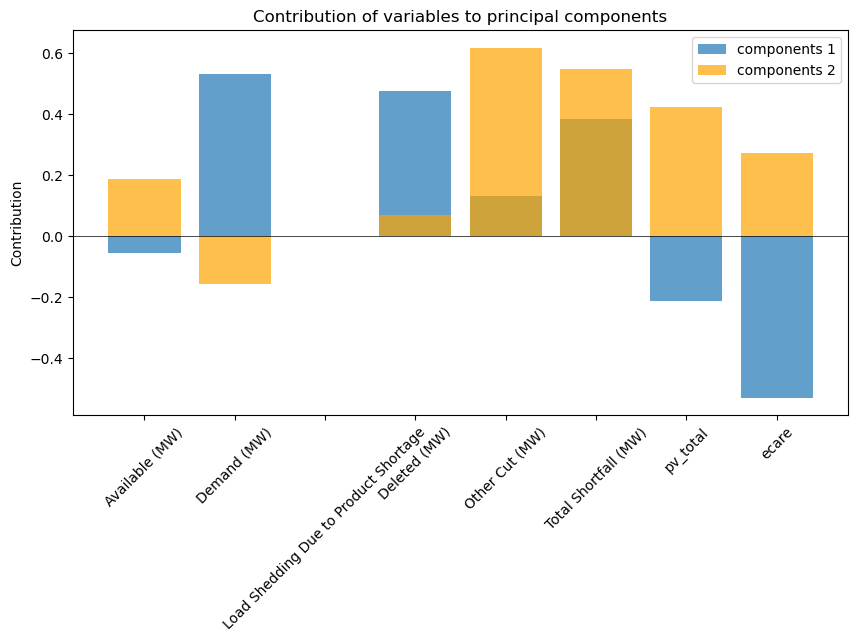

In [101]:
# Extraire les coefficients des variables sur les composantes principales
pca_components = pd.DataFrame(pca.components_, columns=df.drop(columns=["Frequency"]).columns, index=["PC1", "PC2"])

# Afficher les coefficients sous forme de tableau
print("\nCoefficients des variables dans les composantes principales :")
print(pca_components)

# Visualiser l'importance des variables dans chaque composante
plt.figure(figsize=(10, 5))
plt.bar(pca_components.columns, pca_components.loc["PC1"], alpha=0.7, label="components 1")
plt.bar(pca_components.columns, pca_components.loc["PC2"], alpha=0.7, label="components 2", color="orange")
plt.axhline(0, color="black", linewidth=0.5)
plt.xticks(rotation=45)
plt.ylabel("Contribution")
plt.title("Contribution of variables to principal components")
plt.legend()
plt.show()


### Interprétation de PC1 :
Demande (MW) et P. Effacée (MW) ont une forte influence positive sur PC1.

Déficit total (MW) et Autres P. coupée (MW) contribuent également, mais dans une moindre mesure.

pv_total et ecare ont une contribution négative, ce qui signifie que lorsque ces valeurs augmentent, PC1 diminue.

### Interprétation de PC2 :
Autres P. coupée (MW) et Déficit total (MW) ont les plus fortes contributions positives à PC2.

pv_total et ecare influencent également cette composante.

Demande (MW) contribue légèrement négativement, ce qui pourrait indiquer une relation inverse avec les coupures et le déficit.

PC2 semble représenter un axe lié aux coupures d’énergie et au déficit total, en lien avec les variations du PV total et des écarts.

### Conclusion générale
PC1 est fortement lié à la demande d’énergie et aux coupures.

Une demande élevée et un déficit total important contribuent à augmenter PC1.

À l’inverse, lorsque pv_total et ecare augmentent, PC1 diminue.

PC2 est lié aux coupures d’électricité et au déficit.

Autres P. coupée (MW) et Déficit total (MW) jouent un rôle majeur.

pv_total et ecare influencent aussi PC2, mais dans une moindre mesure.



c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(



Correlation between frequency and principal components :
PC1          0.202152
PC2         -0.323799
Frequency    1.000000
Name: Frequency, dtype: float64


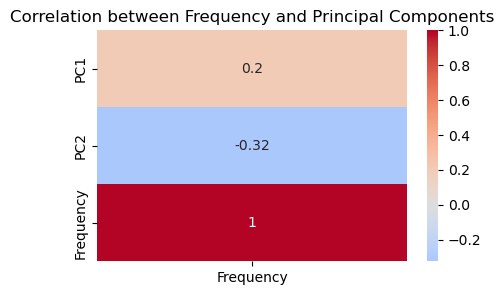

In [102]:
# Ajouter les composantes principales au DataFrame original
df_pca = pd.DataFrame(pca.transform(df.drop(columns=["Frequency"])), columns=["PC1", "PC2"])

# Ajouter la colonne de fréquence
df_pca["Frequency"] = df["Frequency"].values

# Calcul de la corrélation entre la fréquence et les composantes principales
correlation = df_pca.corr()
print("\nCorrelation between frequency and principal components :")
print(correlation["Frequency"])

# Visualisation avec une heatmap
import seaborn as sns

plt.figure(figsize=(5, 3))
sns.heatmap(correlation[["Frequency"]], annot=True, cmap="coolwarm", center=0)
plt.title("Correlation between Frequency and Principal Components")
plt.show()


### analyse factoriel

In [66]:
!pip install factor-analyzer

In [67]:
from factor_analyzer import FactorAnalyzer
from sklearn.preprocessing import StandardScaler
df = fequence_delestage
# 📌 Chargement des données
# Assurez-vous que 'Frequence' et les autres colonnes sont bien numériques
df = df.apply(pd.to_numeric, errors="coerce")  

# 📌 Suppression des valeurs manquantes (si nécessaire)
df = df.dropna()

# 📌 Standardisation des données
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# 📌 Déterminer le nombre optimal de facteurs (Test de Bartlett et KMO)
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity, calculate_kmo

bartlett_stat, bartlett_p_value = calculate_bartlett_sphericity(df)
kmo_all, kmo_model = calculate_kmo(df)

print(f"✅ Test de Bartlett p-value : {bartlett_p_value}")
print(f"✅ Test KMO (Kaiser-Meyer-Olkin) : {kmo_model}")

# 📌 Choisir le nombre de facteurs avec l’analyse du Scree Plot
fa = FactorAnalyzer(n_factors=df.shape[1], rotation=None)
fa.fit(df_scaled)

ev, v = fa.get_eigenvalues()

plt.figure(figsize=(6, 4))
plt.scatter(range(1, len(ev)+1), ev, label="Valeurs propres")
plt.plot(range(1, len(ev)+1), ev, marker="o")
plt.axhline(y=1, color="r", linestyle="--", label="Seuil Kaiser (1)")
plt.xlabel("Nombre de facteurs")
plt.ylabel("Valeurs propres")
plt.title("Scree Plot - Analyse des valeurs propres")
plt.legend()
plt.show()

# 📌 Sélectionner un nombre optimal de facteurs
n_factors = sum(ev > 1)  # Principe de Kaiser (valeur propre > 1)
print(f"📌 Nombre optimal de facteurs : {n_factors}")

# 📌 Exécuter l'Analyse Factorielle avec le bon nombre de facteurs
fa = FactorAnalyzer(n_factors=n_factors, rotation="varimax")  # Rotation Varimax pour meilleure interprétation
fa.fit(df_scaled)

# 📌 Afficher la matrice des charges factorielles
factor_loadings = pd.DataFrame(fa.loadings_, index=df.columns, columns=[f"Facteur {i+1}" for i in range(n_factors)])
print("\n📊 Matrice des Charges Factorielles :")
print(factor_loadings)

# 📌 Visualisation des charges factorielles
plt.figure(figsize=(8, 5))
plt.imshow(factor_loadings.abs(), cmap="coolwarm", aspect="auto")
plt.colorbar(label="Charge Factorielle")
plt.xticks(range(n_factors), [f"Facteur {i+1}" for i in range(n_factors)], rotation=45)
plt.yticks(range(len(df.columns)), df.columns)
plt.title("Matrice des Charges Factorielles")
plt.show()


✅ Test de Bartlett p-value : nan
✅ Test KMO (Kaiser-Meyer-Olkin) : nan


c:\ProgramData\anaconda3\Lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)
c:\ProgramData\anaconda3\Lib\site-packages\factor_analyzer\utils.py:244: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\factor_analyzer\utils.py:90: RuntimeWarning: invalid value encountered in divide
  x = (x - np.mean(x, axis=0)) / np.std(x, axis=0, ddof=0)


ValueError: array must not contain infs or NaNs

## PREDICTION

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(



📊 Évaluation du modèle :
🔹 MAE (Mean Absolute Error) : 0.1412
🔹 MSE (Mean Squared Error) : 0.0335
🔹 R² Score : 0.1129


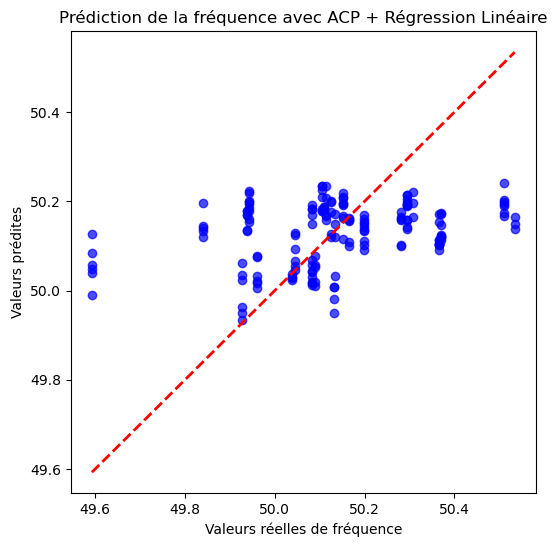

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Création du DataFrame avec les composantes principales
df_pca = pd.DataFrame(pca.transform(df.drop(columns=["Frequence"])), columns=["PC1", "PC2"])

# Ajouter la fréquence comme variable cible
df_pca["Frequence"] = df["Frequence"].values

# Séparation des données en train et test (80% - 20%)
X = df_pca[["PC1", "PC2"]]  # Variables explicatives
y = df_pca["Frequence"]  # Variable cible

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modèle de régression linéaire
model = LinearRegression()
model.fit(X_train, y_train)

# Prédictions
y_pred = model.predict(X_test)

# Évaluation du modèle
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\n📊 Évaluation du modèle :")
print(f"🔹 MAE (Mean Absolute Error) : {mae:.4f}")
print(f"🔹 MSE (Mean Squared Error) : {mse:.4f}")
print(f"🔹 R² Score : {r2:.4f}")

# Visualisation des prédictions vs valeurs réelles
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color="blue")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "--", color="red", linewidth=2)
plt.xlabel("Valeurs réelles de fréquence")
plt.ylabel("Valeurs prédites")
plt.title("Prédiction de la fréquence avec ACP + Régression Linéaire")
plt.show()



🔹 Entraînement du modèle : Régression Linéaire...
📊 Résultats pour Régression Linéaire :
   🔹 MAE : 0.1412
   🔹 MSE : 0.0335
   🔹 R² Score : 0.1129

🔹 Entraînement du modèle : Random Forest...
📊 Résultats pour Random Forest :
   🔹 MAE : 0.1410
   🔹 MSE : 0.0340
   🔹 R² Score : 0.1000

🔹 Entraînement du modèle : SVR...
📊 Résultats pour SVR :
   🔹 MAE : 0.1816
   🔹 MSE : 0.0647
   🔹 R² Score : -0.7123

📌 Comparaison des modèles :
                          MAE       MSE  R² Score
Régression Linéaire  0.141246  0.033543  0.112917
Random Forest        0.140991  0.034030  0.100039
SVR                  0.181563  0.064745 -0.712273


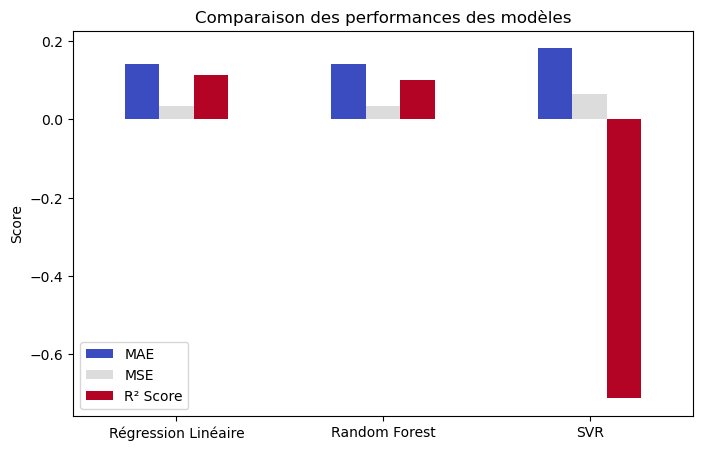

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialisation des modèles
models = {
    "Régression Linéaire": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "SVR": SVR(kernel="rbf", C=100, gamma=0.1)  # SVR avec un noyau RBF
}

# Stockage des résultats
results = {}

# Entraînement et évaluation des modèles
for name, model in models.items():
    print(f"\n🔹 Entraînement du modèle : {name}...")
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Calcul des métriques d'évaluation
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    results[name] = {"MAE": mae, "MSE": mse, "R² Score": r2}
    
    print(f"📊 Résultats pour {name} :")
    print(f"   🔹 MAE : {mae:.4f}")
    print(f"   🔹 MSE : {mse:.4f}")
    print(f"   🔹 R² Score : {r2:.4f}")

# Affichage des résultats sous forme de DataFrame
import pandas as pd
df_results = pd.DataFrame(results).T
print("\n📌 Comparaison des modèles :")
print(df_results)

# Visualisation des performances
import matplotlib.pyplot as plt
df_results.plot(kind="bar", figsize=(8, 5), colormap="coolwarm", rot=0)
plt.title("Comparaison des performances des modèles")
plt.ylabel("Score")
plt.show()


In [ ]:
!pip install xgboost

   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.3/150.0 MB ? eta -:--:--
    --------------------------------------- 2.1/150.0 MB 6.2 MB/s eta 0:00:24
   - -------------------------------------- 3.9/150.0 MB 6.5 MB/s eta 0:00:23
   - -------------------------------------- 5.5/150.0 MB 6.8 MB/s eta 0:00:22
   - -------------------------------------- 6.8/150.0 MB 6.8 MB/s eta 0:00:22
   -- ------------------------------------- 7.9/150.0 MB 6.4 MB/s eta 0:00:23
   -- ------------------------------------- 9.2/150.0 MB 6.3 MB/s eta 0:00:23
   -- ------------------------------------- 10.5/150.0 MB 6.3 MB/s eta 0:00:23
   --- ------------------------------------ 12.1/150.0 MB 6.4 MB/s eta 0:00:22
   --- ------------------------------------ 13.6/150.0 MB 6.5 MB/s eta 0:00:21
   ---- ----------------------------------- 15.2/150.0 MB 6.6 MB/s eta 0:00:21
   ---- ----------------------------------- 16.5/150.0 MB 6.7 MB/s eta 0:0


📊 Résultats XGBoost :
   🔹 MAE : 0.1253
   🔹 MSE : 0.0305
   🔹 R² Score : 0.1938


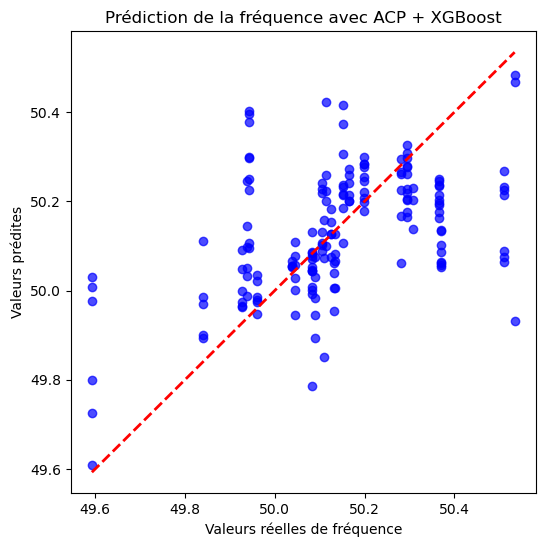

In [ ]:
from xgboost import XGBRegressor
from sklearn.decomposition import PCA
import numpy as np

# 📌 Augmenter le nombre de composantes principales
n_components = 4  # Essayons avec 4 composantes principales
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(df.drop(columns=["Frequence"]))  # Transformer les données
df_pca = pd.DataFrame(X_pca, columns=[f"PC{i+1}" for i in range(n_components)])

# Ajouter la fréquence comme variable cible
df_pca["Frequence"] = df["Frequence"].values

# Nouvelle séparation des données
X = df_pca.drop(columns=["Frequence"])  # Variables explicatives
y = df_pca["Frequence"]  # Variable cible

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 📌 Test avec XGBoost
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
xgb_model.fit(X_train, y_train)

# Prédictions
y_pred_xgb = xgb_model.predict(X_test)

# 📌 Évaluation du modèle
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print("\n📊 Résultats XGBoost :")
print(f"   🔹 MAE : {mae_xgb:.4f}")
print(f"   🔹 MSE : {mse_xgb:.4f}")
print(f"   🔹 R² Score : {r2_xgb:.4f}")

# 📊 Visualisation des résultats
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred_xgb, alpha=0.7, color="blue")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "--", color="red", linewidth=2)
plt.xlabel("Valeurs réelles de fréquence")
plt.ylabel("Valeurs prédites")
plt.title("Prédiction de la fréquence avec ACP + XGBoost")
plt.show()
